In [27]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import StrMethodFormatter

In [2]:
soc_chas = pd.read_csv('clean_data/clean_soc_chas.csv')

In [3]:
soc_chas = soc_chas.dropna(axis=0, how='any').copy()

In [4]:
cost_burden = soc_chas['Percent_of_all_with_cb_over30_percent']
median_household_income = soc_chas['median_household_income']
median_family_income = soc_chas['median_family_income']
median_nonfamily_income = soc_chas['median_nonfamily_income']
poverty_rate = soc_chas['unemployment_rate_pct']
unemployment_rate = soc_chas['unemployment_rate_pct']
crowded_households = soc_chas['crowded_hh_pct']

In [5]:
test = np.array([median_household_income, cost_burden])

In [6]:
np.corrcoef(median_household_income, cost_burden)

array([[1.        , 0.13151259],
       [0.13151259, 1.        ]])

In [11]:
variable_cols = ['median_household_income',
'median_family_income', 'median_nonfamily_income', 'poverty_rate_pct',
'unemployment_rate_pct',
'crowded_hh_pct']
variable_names = ['Median Household Income', 'Median Family Income', 'Median Non-Family Income', 'Poverty Rate', 'Unemployment Rate', 'Crowded Households']

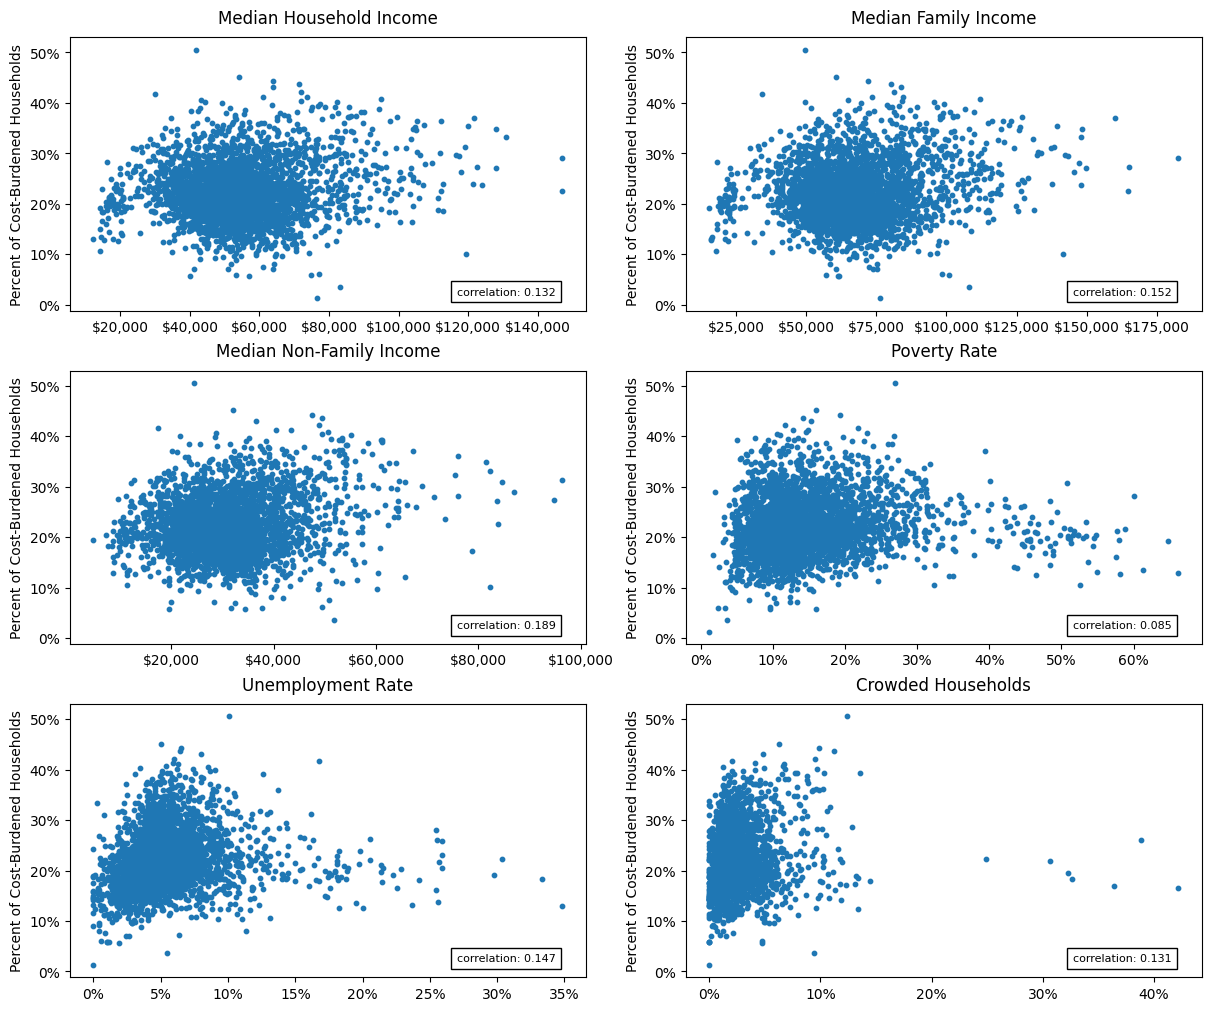

In [38]:
# creating base figure
fig, axs = plt.subplots(3, 2, figsize=(12, 10), layout='constrained')
cost_burden = soc_chas['Percent_of_all_with_cb_over30_percent']/100
i = 0
j = 0
for index in range(0, 6): 
    title = variable_names[index]
    if 'pct' in variable_cols[index]: 
        variable = soc_chas[variable_cols[index]]/100 
        axs[i, j].xaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
    else: 
        variable = soc_chas[variable_cols[index]]
        axs[i, j].xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
    correlation = np.round(np.corrcoef(variable, cost_burden)[0][1],3)
    axs[i, j].set_ylabel('Percent of Cost-Burdened Households')
    axs[i, j].yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
    axs[i, j].scatter(variable, cost_burden, s=10)
    axs[i, j].set_title(title, pad = 10)
    correlation_string = "correlation: " + str(correlation)
    axs[i, j].text(0.75, 0.05, correlation_string, fontsize = 8, transform = axs[i,j].transAxes,
                      verticalalignment = "bottom",
                      horizontalalignment = "left",
                      bbox = {'facecolor': 'white', 'edgecolor': 'black'})
    if j == 2 - 1:
        i = i + 1
        j = 0
    else:
        j = j + 1
